In [156]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import random


# 1 Monte-Carlo Simulation

- prior probabilities: $p(Y=0) = p(Y=1) = \frac{1}{2}$
- likelyhoods $p(X=x|Y=0) = 2-2x$ and $p(X=x|Y=1) = 2x$

## 1.1 Data Creation and Visualization
- Sample an instance label Y according to the prior probabilities 
- sample feature X with the correspojnding likelyhood ("inverse transform sampling": generating sample numbers at random from any probability distribution given its cumulative distribution function)

Cumlative distribution function (CDF: $F_X(x)=P(X\leq x)=\int_{- \infty }^{x} f_x(x') dx'$):
- $F_{X,0}(x)=P(X\leq x|Y=0)=\int_{- \infty }^{x} 2-2x dx = \left[2x-x^2\right]_0^x = 2x-x^2 = y$
- $F_{X,1}(x)=P(X\leq x|Y=1)=\int_{- \infty }^{x} 2x dx = \left[x^2\right]_0^x = x^2 = y$

Inverse of the CDF:
- $F_{X,0}^{-1}(x)=1- \sqrt{1-y}$
- $F_{X,1}^{-1}(x)=\sqrt{y} $ 




In [9]:
def create_data(N):
    X = []
    Y = []
    for i in range(0, N):
        Y_tmp = np.random.randint(2)
        Y.append(Y_tmp)
        u = np.random.rand()
        if Y_tmp == 0:
            X_tmp = 1 - np.sqrt(1-u)
        if Y_tmp == 1:
            X_tmp = np.sqrt(u)
        X.append(X_tmp)
    return X, Y


<span style = "color:green;font-weight:bold">  Comment: It's always better to work with Numpy arrays, since they are faster. This comment also applies for the following. Also the variable names could be more suggestive, although this is a very minor issue. </span>

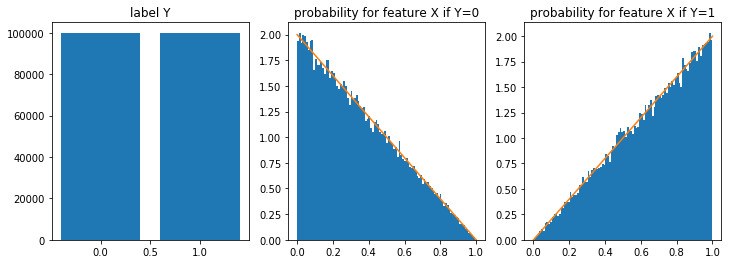

In [23]:
x,y = create_data(100000)
x_0 = []
x_1 = []

for i in range(100000):
    if y[i]==0:
        x_0.append(x[i])
    elif y[i]==1:
        x_1.append(x[i])
    
fig = plt.figure(figsize = (12, 4))

plt.subplot(131)
plt.hist(y, 100)
plt.title('label Y')
plt.bar([0, 1], [len(x), len(y)])

plt.subplot(132)
plt.hist(x_0, 100, density = True)
plt.title('probability for feature X if Y=0')
plt.plot([0,1], [2,0])

plt.subplot(133)
plt.hist(x_1, 100, density = True)
plt.title('probability for feature X if Y=1')
plt.plot([0,1], [0,2])

plt.show()        

It can be seen that the probability for Y=0 and the probability for Y=1 are both 50%. For the feature X, it can be clearly seen that the data distribution corresponds to the theoretical likelyhood (orange line).

<span style = "color:green;font-weight:bold"> Comment: You could have played with the ranges a bit, but this is also of course a very minor issue. I guess it's fine that you didn't plot the cumulative distribution function, as it wasn't asked explicitly. In general, this part is essentially equal to the sample solution, although the last loop could actually be prevented. </span>

## 1.2 Classification by Thresholding
The classification rule can be defined with the help of a threshold value $x_t \in [0,1]$
- Threshold classifier (rule a): $\hat{Y}=f_A(X;x_t)=0$ if $X < x_t$ or $1$ if $X \geq x_t$
- Threshold anti-classifier (rule b): $\hat{Y}=f_B(X;x_t)=1$ if $X < x_t$ or $0$ if $X \geq x_t$ <br>

With the corresponding error rates:
- $p(error|A;x_t)=\frac{1}{4}+(x_t-\frac{1}{2})^2$
- $p(error|B;x_t)=\frac{3}{4}-(x_t-\frac{1}{2})^2=1-p(error|A;x_t)$

In the following, the predicted error rates are compared with the true error rates for different threshold values and different test dataset sizes.

## 1.3 Baseline Classifiers
Furthermore, two other rules that entirely ignore the features are also compared to the results above:

- Guessing (rule c): $\hat{Y}=f_C(X)=0$ with probability $\frac{1}{2}$ or $1$ otherwise
- Constant (rule d): $\hat{Y}=f_D(X)=1$

The error rates are given by:

- $p(error|C)=\frac{1}{2}$ 
- $p(error|D)=\frac{1}{2}$

In [11]:
def rule_a(X, x_t):
    if X < x_t:
        return 0
    else:
        return 1

def rule_b(X, x_t):
    if X < x_t:
        return 1
    else:
        return 0
    
def rule_c(X):
    return random.randrange(2)
    
def rule_d(X, x_t):
    return 1
    
    
def error_a(x_t):
    return 1/4 + (x_t - 1/2)**2

def error_b(x_t):
    return 3/4 - (x_t - 1/2)**2

def error_c():
    return 0.5

def error_d():
    return 0.5

x_t = [0.2, 0.5, 0.6]
M = [10, 100, 1000, 10000]

theo_error_a = np.zeros((3,1))
mean_error_a = np.zeros((3,4))
std_error_a = np.zeros((3,4))

theo_error_b = np.zeros((3,1))
mean_error_b = np.zeros((3,4))
std_error_b = np.zeros((3,4))

theo_error_c = np.zeros((3,1))
mean_error_c = np.zeros((3,4))
std_error_c = np.zeros((3,4))

theo_error_d = np.zeros((3,1))
mean_error_d = np.zeros((3,4))
std_error_d = np.zeros((3,4))

for t in range(len(x_t)):
        theo_error_a[t,0] = error_a(x_t[t])
        theo_error_b[t,0] = error_b(x_t[t])
        theo_error_c[t,0] = error_c()
        theo_error_d[t,0] = error_d()
        
        for m in range(len(M)):
            errors_list_a = []
            errors_list_b = []
            errors_list_c = []
            errors_list_d = []
            
            for i in range(10):
                errors_a = 0
                errors_b = 0
                errors_c = 0
                errors_d = 0
                
                x, y = create_data(M[m])
                
                for l in range(M[m]):
                    if rule_a(x[l], x_t[t]) != y[l]:
                        errors_a+=1
                    if rule_b(x[l], x_t[t]) != y[l]:
                        errors_b+=1
                    if rule_c(x[l]) != y[l]:
                        errors_c+=1
                    if rule_c(x[l]) != y[l]:
                        errors_d+=1
                        
                        
                errors_list_a.append(errors_a/M[m])
                errors_list_b.append(errors_b/M[m])
                errors_list_c.append(errors_c/M[m])
                errors_list_d.append(errors_d/M[m])
                
            mean_error_a[t, m] = np.mean(errors_list_a)
            mean_error_b[t, m] = np.mean(errors_list_b)
            mean_error_c[t, m] = np.mean(errors_list_c)
            mean_error_d[t, m] = np.mean(errors_list_d)
            
            std_error_a[t, m] = np.std(errors_list_a)
            std_error_b[t, m] = np.std(errors_list_b)
            std_error_c[t, m] = np.std(errors_list_c)
            std_error_d[t, m] = np.std(errors_list_d)       

The experimental achieved error rates are compared to the predicted error rates:

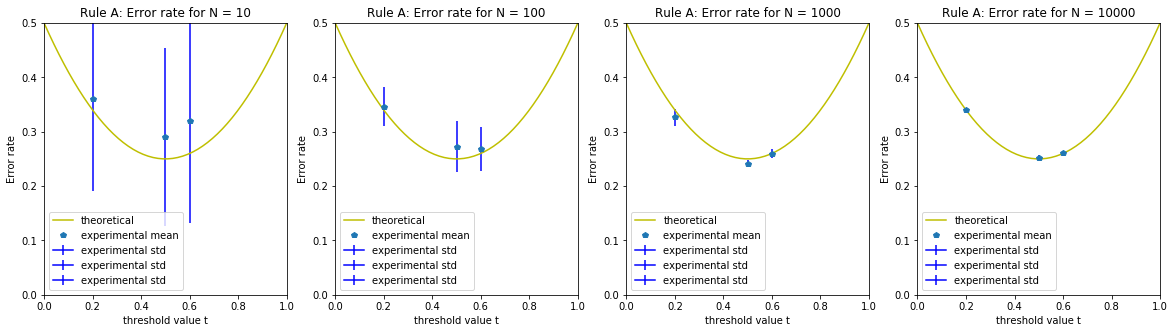

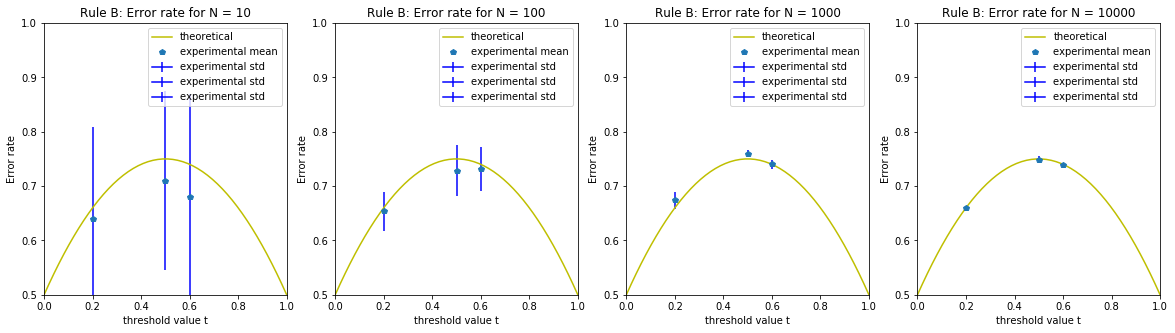

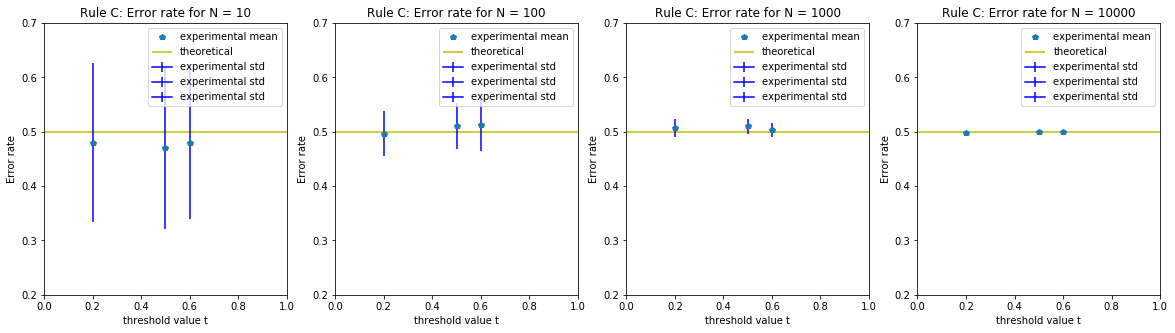

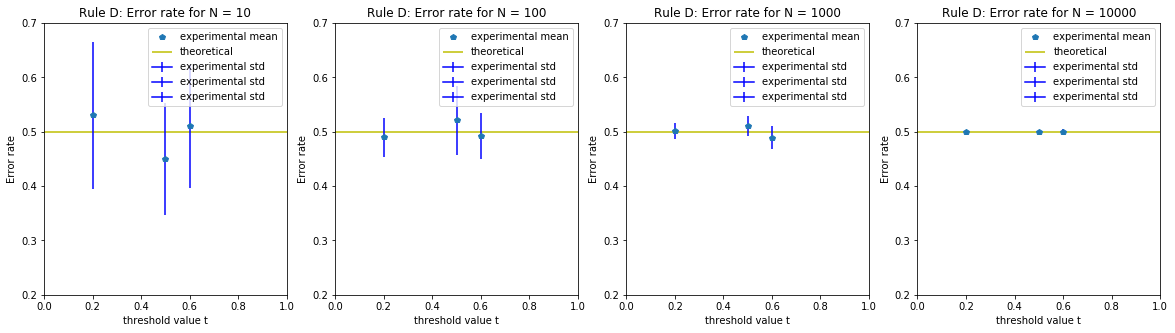

In [12]:
x = np.linspace(0, 1)

fig = plt.figure(figsize = (20, 5))
for m in range(len(M)):
    plt.subplot(1, 4, m+1)
    plt.plot(x, error_a(x), color = 'y', label = 'theoretical')
    plt.plot(x_t, mean_error_a[:,m], 'p', label = 'experimental mean')
    for i in range(3):
        plt.errorbar(x_t[i], mean_error_a[i,m], yerr=std_error_a[i,m], color = 'b', label = 'experimental std')
    plt.title('Rule A: Error rate for N = {}'.format(M[m]))
    plt.xlabel('threshold value t')
    plt.ylabel('Error rate')
    plt.axis([0, 1, 0, 0.5])
    plt.legend()

fig = plt.figure(figsize = (20, 5))
for m in range(len(M)):
    plt.subplot(1, 4, m+1)
    plt.plot(x, error_b(x), color = 'y', label = 'theoretical')
    plt.plot(x_t, mean_error_b[:,m], 'p', label = 'experimental mean')
    for i in range(3):
        plt.errorbar(x_t[i], mean_error_b[i,m], yerr=std_error_b[i,m], color = 'b', label = 'experimental std')
    plt.title('Rule B: Error rate for N = {}'.format(M[m]))
    plt.xlabel('threshold value t')
    plt.ylabel('Error rate')
    plt.axis([0, 1, 0.5, 1])
    plt.legend()

fig = plt.figure(figsize = (20, 5))
for m in range(len(M)):
    plt.subplot(1, 4, m+1)
    plt.hlines(error_c(), 0, 1, color = 'y', label = 'theoretical',)
    plt.plot(x_t, mean_error_c[:,m], 'p', label = 'experimental mean')
    for i in range(3):
        o=plt.errorbar(x_t[i], mean_error_c[i,m], yerr=std_error_c[i,m], color = 'b', label = 'experimental std')
    plt.title('Rule C: Error rate for N = {}'.format(M[m]))
    plt.xlabel('threshold value t')
    plt.ylabel('Error rate')
    plt.axis([0, 1, 0.20, 0.7])
    plt.legend()
    
fig = plt.figure(figsize = (20, 5))
for m in range(len(M)):
    plt.subplot(1, 4, m+1)
    plt.hlines(error_d(), 0, 1, color = 'y', label = 'theoretical',)
    plt.plot(x_t, mean_error_d[:,m], 'p', label = 'experimental mean')
    for i in range(3):
        plt.errorbar(x_t[i], mean_error_d[i,m], yerr=std_error_d[i,m], color = 'b', label = 'experimental std')
    plt.title('Rule D: Error rate for N = {}'.format(M[m]))
    plt.xlabel('threshold value t')
    plt.ylabel('Error rate')
    plt.axis([0, 1, 0.20, 0.7])
    plt.legend()

It can be experimentally shown that the predicted error rates are correct. The theoretical values are within the error range of the experimental values. The minimum overall error of 25% is achieved for the treshhold value of $x_{t}=0.5$, which is the corresponding x-value for the minimum in the graphs for rule A. Also, the error rates for rule C and rule D can be experimentally confirmed. 

<span style = "color:green;font-weight:bold"> Comments: Truly amazing diagrams, which visualize the situation much more elegantly than the sample solution. </span>

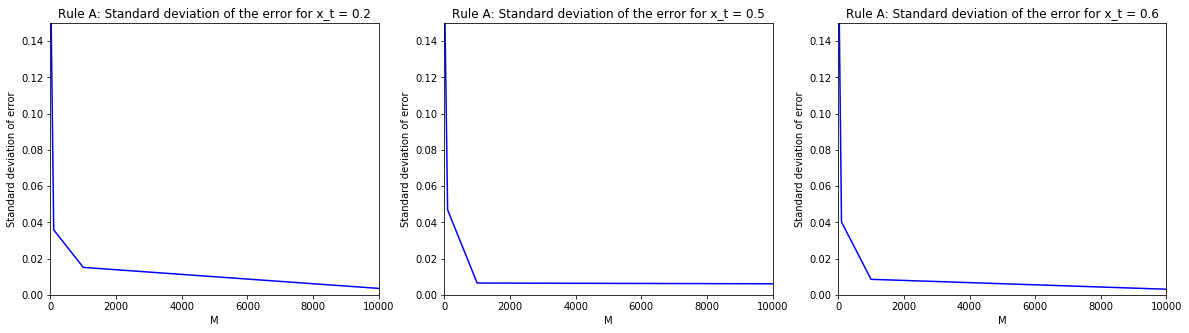

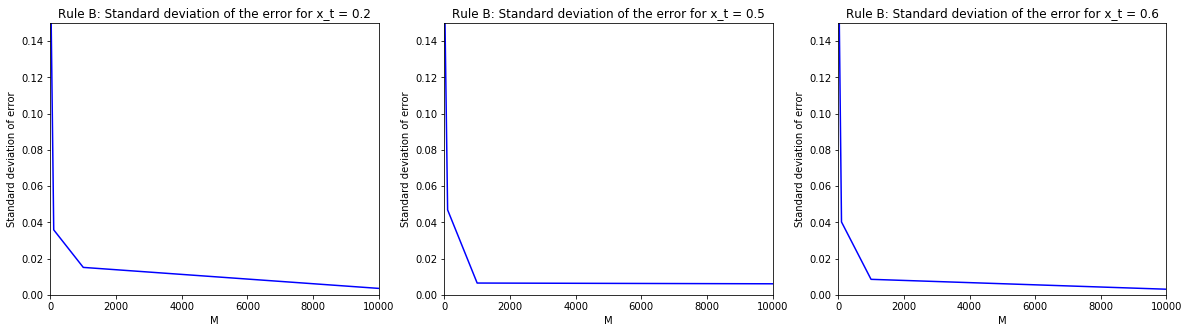

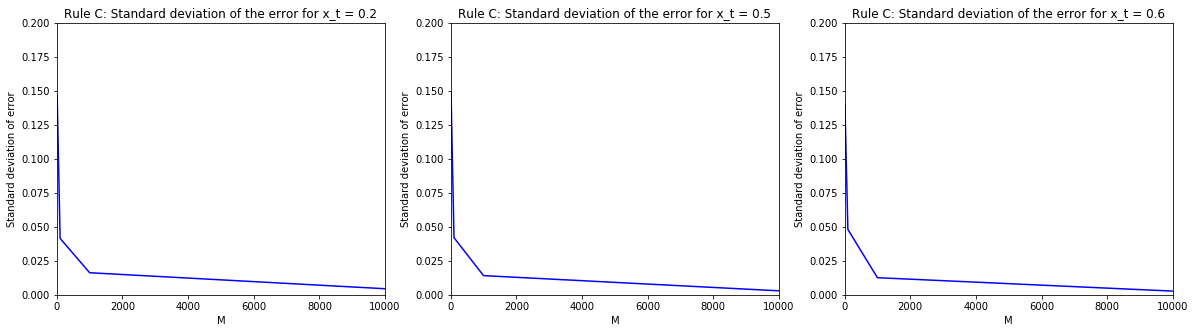

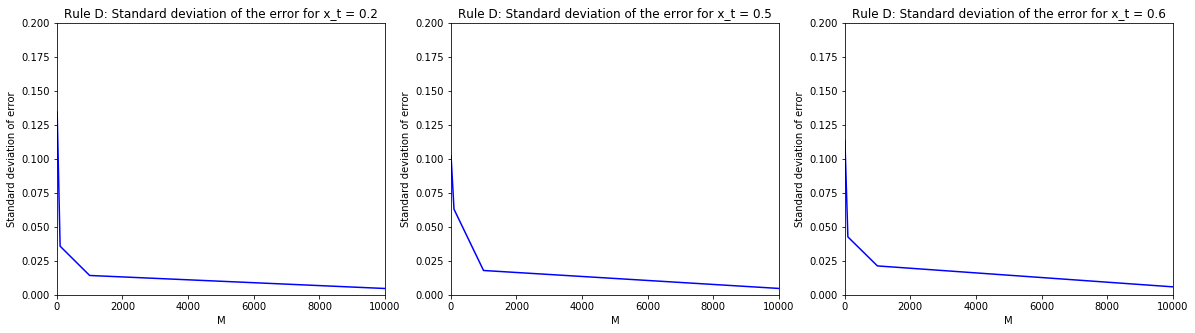

In [13]:
fig = plt.figure(figsize = (20, 5))
for i in range(len(x_t)):
    plt.subplot(1, 3, i+1)
    plt.plot(M, std_error_a[i,:], color = 'b')
    plt.title('Rule A: Standard deviation of the error for x_t = {}'.format(x_t[i]))
    plt.xlabel('M')
    plt.ylabel('Standard deviation of error')
    plt.axis([0, 10000, 0, 0.15])
    
fig = plt.figure(figsize = (20, 5))
for i in range(len(x_t)):
    plt.subplot(1, 3, i+1)
    plt.plot(M, std_error_b[i,:], color = 'b')
    plt.title('Rule B: Standard deviation of the error for x_t = {}'.format(x_t[i]))
    plt.xlabel('M')
    plt.ylabel('Standard deviation of error')
    plt.axis([0, 10000, 0, 0.15])
    
    
fig = plt.figure(figsize = (20, 5))
for i in range(len(x_t)):
    plt.subplot(1, 3, i+1)
    plt.plot(M, std_error_c[i,:], color = 'b')
    plt.title('Rule C: Standard deviation of the error for x_t = {}'.format(x_t[i]))
    plt.xlabel('M')
    plt.ylabel('Standard deviation of error')
    plt.axis([0, 10000, 0, 0.2])
    
fig = plt.figure(figsize = (20, 5))
for i in range(len(x_t)):
    plt.subplot(1, 3, i+1)
    plt.plot(M, std_error_d[i,:], color = 'b')
    plt.title('Rule D: Standard deviation of the error for x_t = {}'.format(x_t[i]))
    plt.xlabel('M')
    plt.ylabel('Standard deviation of error')
    plt.axis([0, 10000, 0, 0.2])

    

    


With increasing the test sizes the standard deviation of the error reduces and thus we get more precise results, which align with our theoretical expectations.

**Comment:** *It could have been possible to put the results for a specific rule into a single diagram, as these make it hard to compare them.*

## 1.4 Nearest Neighbor Classification
In this exercice, the NN classifier ist implemented for the toy problem from exercice 1.1. This classifier is tested for different training sets of N=2 and N=100.

In [150]:
#create test data

N=1000
x,y=create_data(N)

#Convert into single array for comparison with training set
testdata = np.zeros((N, 2))
for i in range(N):
    testdata[i,:] = (x[i],y[i])


In [151]:
#create train data (n=2)

def create_traindata2(n):
    #sample a training set with N=2, which contains one instance of either class
    #define one array for each class
    cl0 = np.zeros((1, 2))
    cl1 = np.zeros((1, 2))
    for i in range(1):
        x_0 = 1 - np.sqrt(1 - np.random.rand()) 
        x_1 = np.sqrt(np.random.rand())
        cl0[i, 0] = x_0
        cl0[i, 1] = 0
        cl1[i, 0] = x_1
        cl1[i, 1] = 1
    return np.vstack((cl0, cl1))


In [152]:
def nneighbor_classifier(test_data, train_data):
   
    d = np.abs(train_data[:, 0] - test_data)
    pos = np.argmin(d)
    clas = train_data[pos, 1]
    return clas


In [153]:
#create train data (N=100)
N=100
def create_traindata100(N):
    #sample a training set with N=2, which contains one instance of either class
    #define one array for each class
    cl0 = np.zeros((50, 2))
    cl1 = np.zeros((50, 2))
    for i in range(50):
        x_0 = 1 - np.sqrt(1 - np.random.rand()) 
        x_1 = np.sqrt(np.random.rand())
        cl0[i, 0] = x_0
        cl0[i, 1] = 0
        cl1[i, 0] = x_1
        cl1[i, 1] = 1
    return np.vstack((cl0, cl1))


In [154]:
#Compare mean values


def error_values(k):
    
    final_mean=[]
    final_std=[]
    for j in range (k):
        

        n=100

        errors_2 = []

        #create train data and average over errors
        for m in range(n):

            train_data=create_traindata2(2)

            #determine error for each training set directly
            n_errors = 0
            for instance in testdata:
                if nneighbor_classifier(instance[0], train_data) != instance[1]: 
                    n_errors += 1
            errors_2.append((n_errors) / len(testdata))
        
        c=np.mean(errors_2)
        final_mean.append(c)
        d=np.std(errors_2)
        final_std.append(d)
    return final_mean, final_std

data=error_values(5)


#Compare mean values

def error_values_100(k):
    
    final_mean=[]
    final_std=[]
    for j in range (k):
        

        n=100

        errors_2 = []

        #create train data and average over errors
        for m in range(n):

            train_data=create_traindata100(100)

            #determine error for each training set directly
            n_errors = 0
            for instance in testdata:
                if nneighbor_classifier(instance[0], train_data) != instance[1]: 
                    n_errors += 1
            errors_2.append((n_errors) / len(testdata))
        
        c=np.mean(errors_2)
        final_mean.append(c)
        d=np.std(errors_2)
        final_std.append(d)
    return final_mean, final_std

data2=error_values_100(5)


In [155]:
table_errors=pd.DataFrame(
    {
        "mean N=2": data[0],
        "std N=2": data[1],
        "mean N=100": data2[0],
        "std N=100": data2[1],
    }

)
table_errors

,mean N=2,std N=2,mean N=100,std N=100
0,0.36702,0.184762,0.32971,0.023248
1,0.36990,0.191530,0.33227,0.023957
2,0.34149,0.171745,0.32972,0.023085
3,0.33357,0.154734,0.33069,0.028643
4,0.31849,0.145571,0.33011,0.023805


For N=2 the mean error is around 35%. For N=100 the mean error is slightly under 35% with a significantly smaller standard deviation.

<span style = "color:green;font-weight:bold"> Comment: Unfortunately you are using too many loops and this is not that great for the speed of the execution of the code. Otherwise it's quite nice that you calculated the mean and the standard deviation more than once, although it wasn't not explicitly asked for. </span>